# The Sparks Foundation Internship
### Name: Jeet Maheshbhai Joshi
### Domain: IOT & Computer Vision

## Task 1 :- Object Detection.........

#### Step 1:- Import All Required Libraries.........

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Step 2:- Load the Yolov3 Model's structure and pretrained Waights..............  

In [2]:
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

#### Step 3:- Load the class Id's.................

In [3]:
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

#### Step 4:- Define Layers............

In [4]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

#### Step 5:- Performing Object Detection..............
#### (a) - Reading images
#### (b) - Preprocessing
#### (c) - Prediction
#### (d) - Get Anchor Boxes and Id's
#### (e) - Show the Output

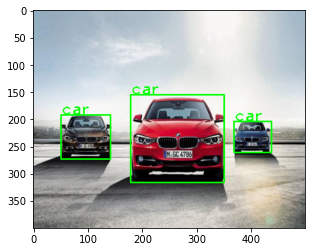

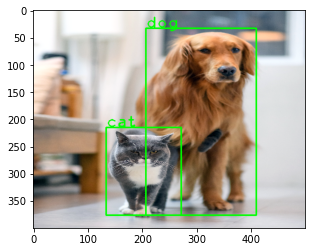

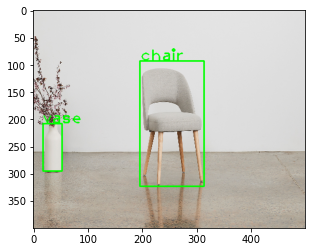

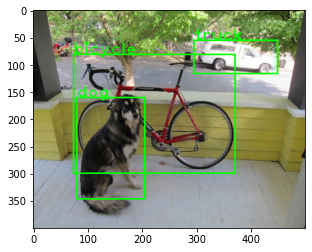

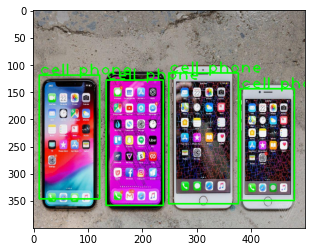

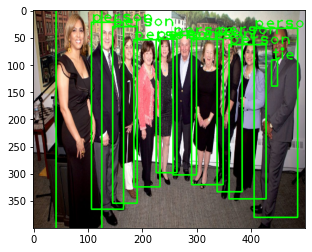

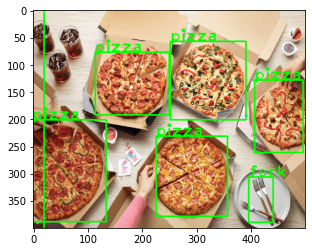

In [5]:
for i in range(7):
    img = cv2.imread(f"{i}.jpg")
    img = cv2.resize(img, (500,400), fx=0.4, fy=0.4)
    height, width, channels = img.shape

    blob = cv2.dnn.blobFromImage(img, 0.00392, (320, 320), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.1:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 2)
            cv2.putText(img, label, (x, y), font, 2, (0,255,0), 2)
    plt.imshow(img)
    plt.show()

## Refrence:-
#### https://cocodataset.org/#home
#### https://pjreddie.com/darknet/yolo/